<a href="https://colab.research.google.com/github/Youstina-Raouf/DataOrbitProject/blob/main/01_data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for nicer plots
sns.set(style="whitegrid")


In [2]:
beneficiaries = pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv', engine='python', on_bad_lines='warn')
labels = pd.read_csv('/content/Train-1542865627584.csv')

In [3]:
print("BENEFICIARY DATA (1 row = 1 patient)")
display(beneficiaries.head())

print("INPATIENT CLAIMS (1 row = 1 claim)")
display(inpatient.head())

print("OUTPATIENT CLAIMS (1 row = 1 claim)")
display(outpatient.head())

print("LABELS (1 row = 1 provider)")
display(labels.head())


BENEFICIARY DATA (1 row = 1 patient)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


INPATIENT CLAIMS (1 row = 1 claim)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


OUTPATIENT CLAIMS (1 row = 1 claim)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


LABELS (1 row = 1 provider)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
# Quick look
print(beneficiaries.head())
print(beneficiaries.info())
print(beneficiaries.isnull().sum())

      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2 

In [5]:
# Quick look
print(inpatient.head())
print(inpatient.info())
print(inpatient.isnull().sum())

      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2 

In [6]:
# Quick look
print(outpatient.head())
print(outpatient.info())
print(outpatient.isnull().sum())

      BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723

In [7]:
# Quick look
print(labels.head())
print(labels.info())
print(labels.isnull().sum())

   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
None
Provider          0
PotentialFraud    0
dtype: int64


In [8]:
# CLEAN +MERGE SECTION
# Standardize ID columns before merging
inpatient.rename(columns={'BENE_ID': 'BeneID'}, inplace=True)
beneficiaries.rename(columns={'BeneID': 'BeneID'}, inplace=True)
outpatient.rename(columns={'BeneID': 'BeneID'}, inplace=True)

# Mark claim source to keep track of claim behavior
inpatient['ClaimType'] = 'Inpatient'
outpatient['ClaimType'] = 'Outpatient'

# Combine the two claims datasets
claims = pd.concat([inpatient, outpatient], axis=0, ignore_index=True)

print("Combined claims shape:", claims.shape)

# Merge with beneficiaries
full_data = claims.merge(beneficiaries, on='BeneID', how='left')

print("After merging beneficiaries:", full_data.shape)

# Merge with labels (fraud label)
full_data = full_data.merge(labels[['Provider','PotentialFraud']], on='Provider', how='left')

print("Final merged dataset shape:", full_data.shape)
full_data.head()


Combined claims shape: (558211, 31)
After merging beneficiaries: (558211, 55)
Final merged dataset shape: (558211, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [9]:
missing_summary = full_data.isnull().mean().sort_values(ascending=False)
missing_summary.head(20)


,0
ClmProcedureCode_6,1.000000
ClmProcedureCode_5,0.999984
ClmProcedureCode_4,0.999789
ClmProcedureCode_3,0.998264
DOD,0.992600
ClmDiagnosisCode_10,0.991025
ClmProcedureCode_2,0.990165
ClmProcedureCode_1,0.958242
AdmissionDt,0.927493
DischargeDt,0.927493


In [10]:

#MISSING DATA HANDLING

# Numeric columns
numeric_cols = full_data.select_dtypes(include=['float64', 'int64']).columns

# For numeric features:
# - Monetary fields: fill with 0 (missing means no claim)
# - Rare numeric procedure codes: keep NaN (will encode later)
# - Others: median

money_fields = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']

full_data[money_fields] = full_data[money_fields].fillna(0)

# Fill remaining numeric columns (except money fields) with median
remaining_numeric = [c for c in numeric_cols if c not in money_fields]
full_data[remaining_numeric] = full_data[remaining_numeric].fillna(
    full_data[remaining_numeric].median()
)


# Categorical columns
categorical_cols = full_data.select_dtypes(include=['object']).columns

# Columns where missing has meaning → replace with 'Unknown'
safe_unknown = [
    'AttendingPhysician',
    'OperatingPhysician',
    'OtherPhysician',
    'ClmAdmitDiagnosisCode'
]

full_data[safe_unknown] = full_data[safe_unknown].fillna('Unknown')

# Diagnosis codes: also fill with 'None' (not unknown, but no diagnosis)
diagnosis_cols = [c for c in categorical_cols if 'ClmDiagnosisCode' in c]
full_data[diagnosis_cols] = full_data[diagnosis_cols].fillna('None')

# Procedure codes: fill with 'None'
proc_cols = [c for c in categorical_cols if 'ClmProcedureCode' in c]
full_data[proc_cols] = full_data[proc_cols].fillna('None')

# ClaimType must never be missing
full_data['ClaimType'] = full_data['ClaimType'].fillna('Unknown')

# Provider and BeneID should not be touched — do NOT fill these


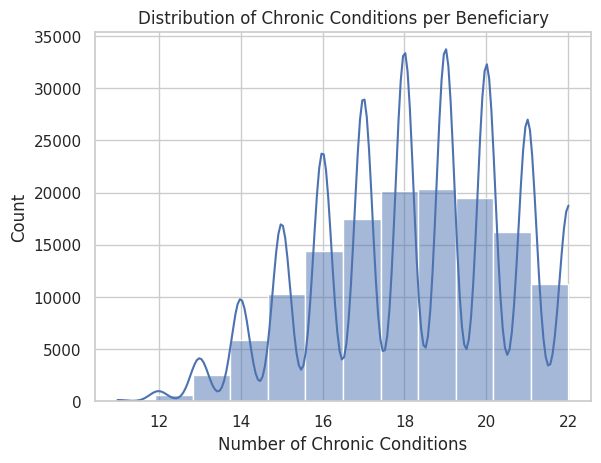

In [11]:
# Count how many chronic conditions each beneficiary has
chronic_cols = [
    'ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
    'ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression',
    'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis','ChronicCond_stroke'
]

beneficiaries['NumChronic'] = beneficiaries[chronic_cols].sum(axis=1)

sns.histplot(beneficiaries['NumChronic'], bins=12, kde=True)
plt.title("Distribution of Chronic Conditions per Beneficiary")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Count")
plt.show()


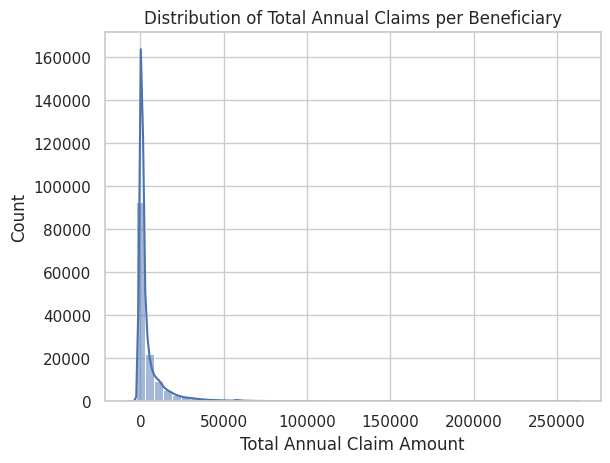

In [12]:
# Claims per Beneficiary
beneficiaries['TotalAnnualClaims'] = (
    beneficiaries['IPAnnualReimbursementAmt'] +
    beneficiaries['OPAnnualReimbursementAmt']
)

sns.histplot(beneficiaries['TotalAnnualClaims'], bins=50, kde=True)
plt.title("Distribution of Total Annual Claims per Beneficiary")
plt.xlabel("Total Annual Claim Amount")
plt.ylabel("Count")
plt.show()


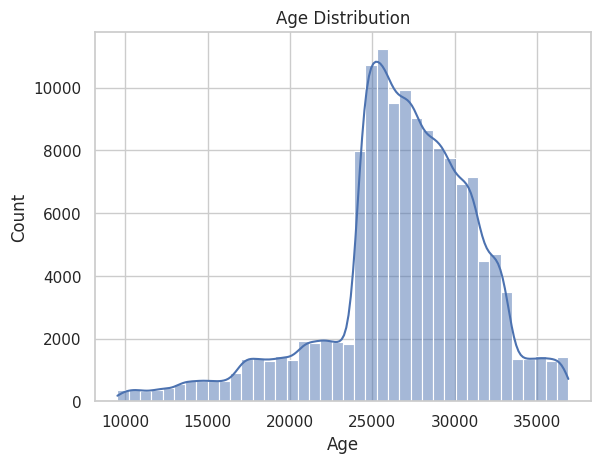

In [13]:
# Age Distribution
DOB = pd.to_datetime(beneficiaries['DOB'])
beneficiaries['Age'] = (pd.to_datetime("2009-12-31") - DOB).dt.days

sns.histplot(beneficiaries['Age'], bins=40, kde=True)
plt.title("Age Distribution")
plt.show()


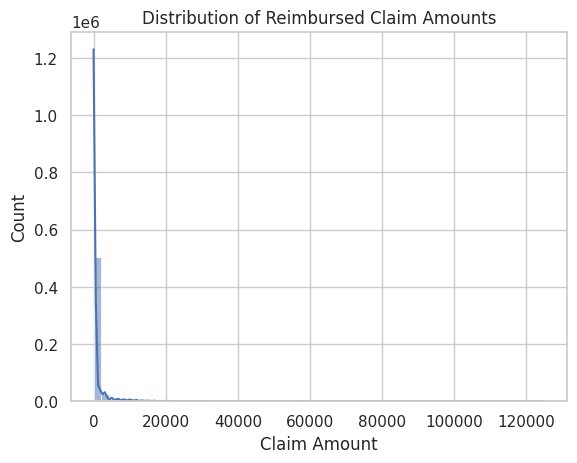

In [14]:
# Claim Amount Distribution
sns.histplot(claims['InscClaimAmtReimbursed'], bins=60, kde=True)
plt.title("Distribution of Reimbursed Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Count")
plt.show()


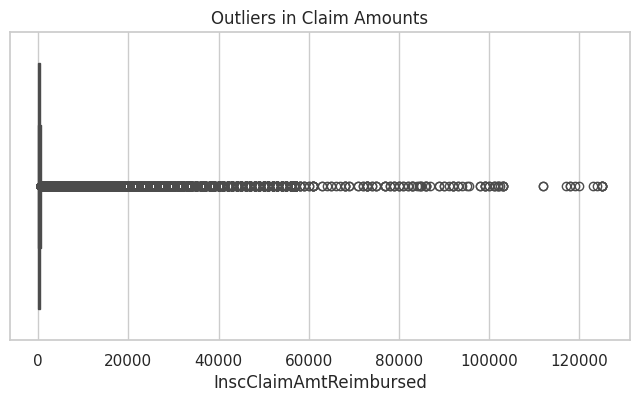

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x=claims['InscClaimAmtReimbursed'])
plt.title("Outliers in Claim Amounts")
plt.show()


In [16]:

# PROVIDER-LEVEL AGGREGATES

provider_summary = full_data.groupby('Provider').agg(
    TotalClaim=('InscClaimAmtReimbursed', 'sum'),
    AvgClaim=('InscClaimAmtReimbursed', 'mean'),
    MaxClaim=('InscClaimAmtReimbursed', 'max'),
    StdClaim=('InscClaimAmtReimbursed', 'std'),        # high variance = fraud signal

    NumClaims=('ClaimID', 'count'),
    UniquePatients=('BeneID', 'nunique'),

    InpatientClaims=('ClaimType', lambda x: (x == 'Inpatient').sum()),
    OutpatientClaims=('ClaimType', lambda x: (x == 'Outpatient').sum()),
)

# Replace NaN std with 0 (single-claim providers)
provider_summary['StdClaim'] = provider_summary['StdClaim'].fillna(0)

# Derived ratios — VERY predictive
provider_summary['ClaimPerPatient'] = (
    provider_summary['NumClaims'] / provider_summary['UniquePatients']
)

provider_summary['AvgClaimPerPatient'] = (
    provider_summary['TotalClaim'] / provider_summary['UniquePatients']
)

provider_summary['InpatientRatio'] = (
    provider_summary['InpatientClaims'] /
    (provider_summary['NumClaims'] + 1e-6)
)

provider_summary['OutpatientRatio'] = (
    provider_summary['OutpatientClaims'] /
    (provider_summary['NumClaims'] + 1e-6)
)

provider_summary.head()


,TotalClaim,AvgClaim,MaxClaim,StdClaim,NumClaims,UniquePatients,InpatientClaims,OutpatientClaims,ClaimPerPatient,AvgClaimPerPatient,InpatientRatio,OutpatientRatio
Provider,,,,,,,,,,,,
PRV51001,104640,4185.600000,42000,10796.091144,25,24,5,20,1.041667,4360.000000,0.200000,0.800000
PRV51003,605670,4588.409091,57000,7309.794729,132,117,62,70,1.128205,5176.666667,0.469697,0.530303
PRV51004,52170,350.134228,3300,689.963754,149,138,0,149,1.079710,378.043478,0.000000,1.000000
PRV51005,280910,241.124464,4080,491.556392,1165,495,0,1165,2.353535,567.494949,0.000000,1.000000
PRV51007,33710,468.194444,10000,1433.769116,72,58,3,69,1.241379,581.206897,0.041667,0.958333


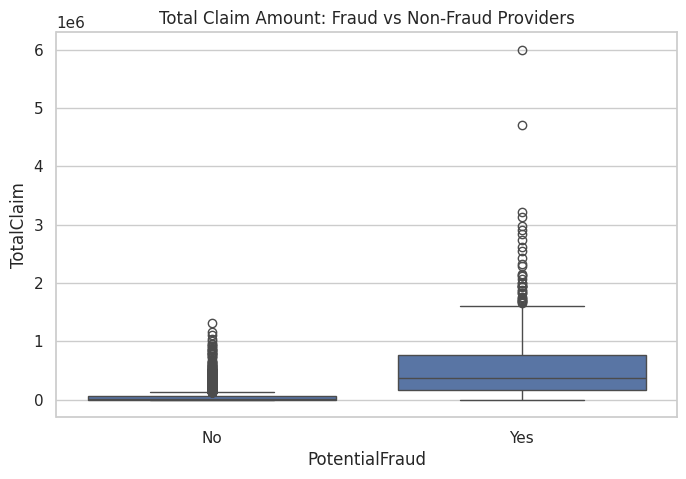

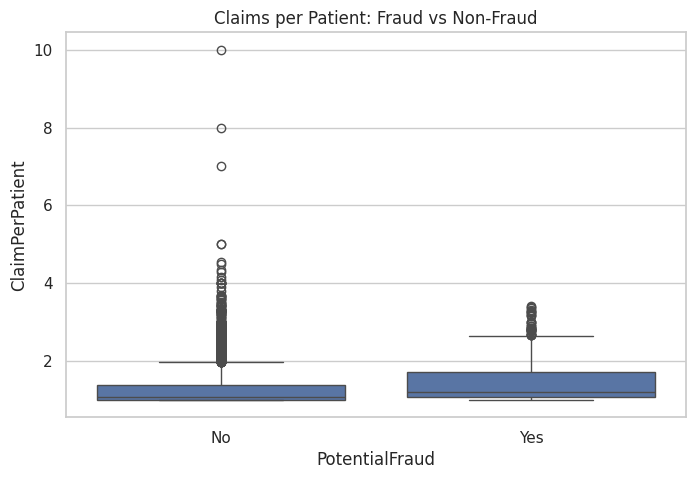

In [17]:
fraud_groups = provider_summary.merge(labels[['Provider','PotentialFraud']], on='Provider')

plt.figure(figsize=(8,5))
sns.boxplot(x='PotentialFraud', y='TotalClaim', data=fraud_groups)
plt.title("Total Claim Amount: Fraud vs Non-Fraud Providers")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='PotentialFraud', y='ClaimPerPatient', data=fraud_groups)
plt.title("Claims per Patient: Fraud vs Non-Fraud")
plt.show()


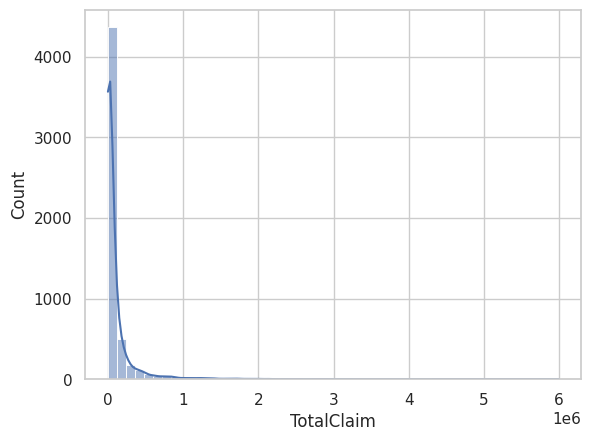

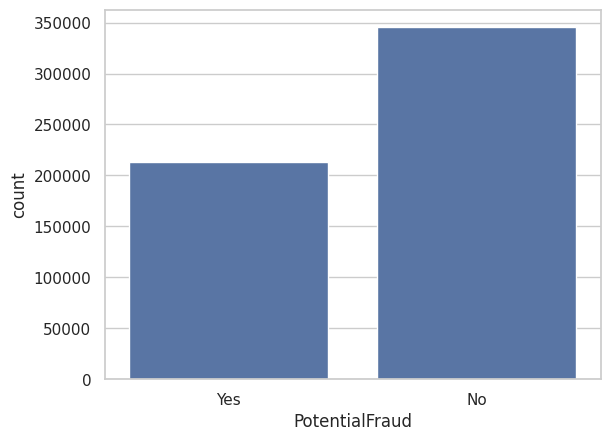

In [18]:
# Distribution of TotalClaim
sns.histplot(provider_summary['TotalClaim'], bins=50, kde=True)
plt.show()

# Fraud vs Non-fraud counts
sns.countplot(x='PotentialFraud', data=full_data)
plt.show()

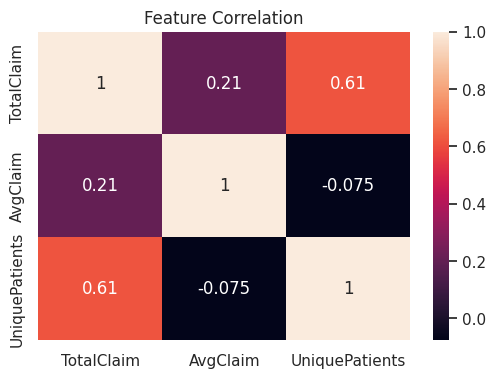

In [19]:
# Optional: correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(provider_summary[['TotalClaim','AvgClaim','UniquePatients']].corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

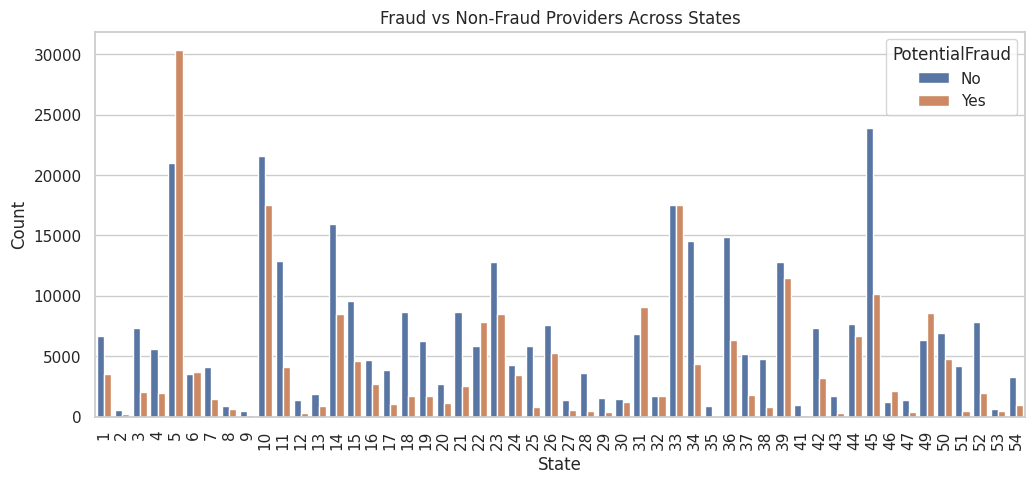

In [26]:
# FRAUD DISTRIBUTION ACROSS STATES
plt.figure(figsize=(12,5))
sns.countplot(x='State', hue='PotentialFraud', data=full_data)
plt.title("Fraud vs Non-Fraud Providers Across States")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

In [20]:
# Merge provider-level fraud labels
labels_clean = labels[['Provider', 'PotentialFraud']].drop_duplicates()

provider_features = provider_summary.merge(
    labels_clean,
    on='Provider',
    how='left'
)

provider_features.head()

,Provider,TotalClaim,AvgClaim,MaxClaim,StdClaim,NumClaims,UniquePatients,InpatientClaims,OutpatientClaims,ClaimPerPatient,AvgClaimPerPatient,InpatientRatio,OutpatientRatio,PotentialFraud
0,PRV51001,104640,4185.600000,42000,10796.091144,25,24,5,20,1.041667,4360.000000,0.200000,0.800000,No
1,PRV51003,605670,4588.409091,57000,7309.794729,132,117,62,70,1.128205,5176.666667,0.469697,0.530303,Yes
2,PRV51004,52170,350.134228,3300,689.963754,149,138,0,149,1.079710,378.043478,0.000000,1.000000,No
3,PRV51005,280910,241.124464,4080,491.556392,1165,495,0,1165,2.353535,567.494949,0.000000,1.000000,Yes
4,PRV51007,33710,468.194444,10000,1433.769116,72,58,3,69,1.241379,581.206897,0.041667,0.958333,No


In [21]:
# Encode fraud label
provider_features['fraud_label'] = provider_features['PotentialFraud'].map({
    'No': 0,
    'Yes': 1
})

provider_features['fraud_label'] = provider_features['fraud_label'].fillna(0).astype(int)
provider_features['fraud_label'].value_counts()


,count
fraud_label,
0,4904
1,506


In [22]:
# Derived features
provider_features['ClaimPerPatient'] = (
    provider_features['NumClaims'] / provider_features['UniquePatients']
)

provider_features['AvgClaimPerPatient'] = (
    provider_features['TotalClaim'] / provider_features['UniquePatients']
)

provider_features.head()

,Provider,TotalClaim,AvgClaim,MaxClaim,StdClaim,NumClaims,UniquePatients,InpatientClaims,OutpatientClaims,ClaimPerPatient,AvgClaimPerPatient,InpatientRatio,OutpatientRatio,PotentialFraud,fraud_label
0,PRV51001,104640,4185.600000,42000,10796.091144,25,24,5,20,1.041667,4360.000000,0.200000,0.800000,No,0
1,PRV51003,605670,4588.409091,57000,7309.794729,132,117,62,70,1.128205,5176.666667,0.469697,0.530303,Yes,1
2,PRV51004,52170,350.134228,3300,689.963754,149,138,0,149,1.079710,378.043478,0.000000,1.000000,No,0
3,PRV51005,280910,241.124464,4080,491.556392,1165,495,0,1165,2.353535,567.494949,0.000000,1.000000,Yes,1
4,PRV51007,33710,468.194444,10000,1433.769116,72,58,3,69,1.241379,581.206897,0.041667,0.958333,No,0


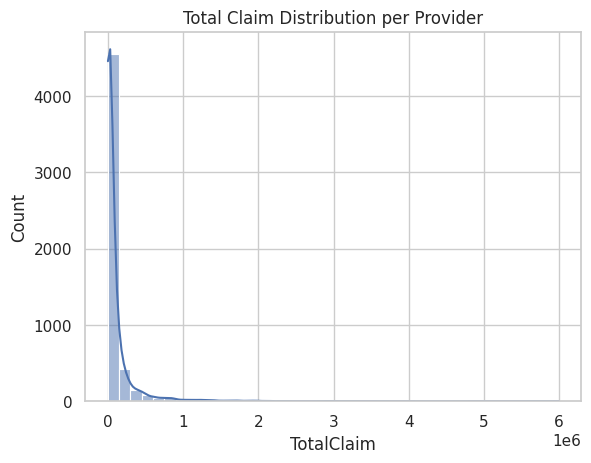

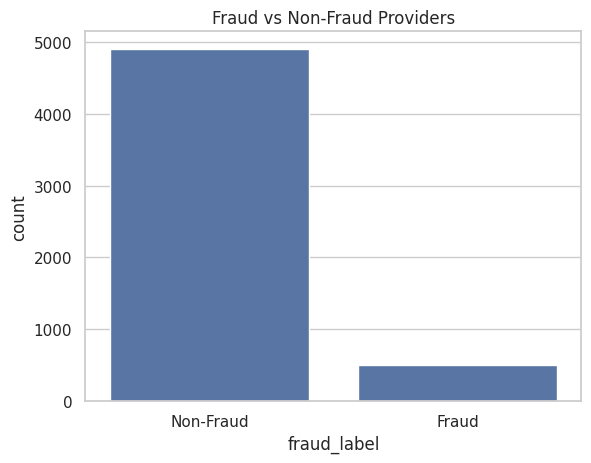

In [23]:
# TotalClaim histogram
sns.histplot(provider_features['TotalClaim'], bins=40, kde=True)
plt.title("Total Claim Distribution per Provider")
plt.show()

# Fraud distribution
sns.countplot(x='fraud_label', data=provider_features)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.title("Fraud vs Non-Fraud Providers")
plt.show()

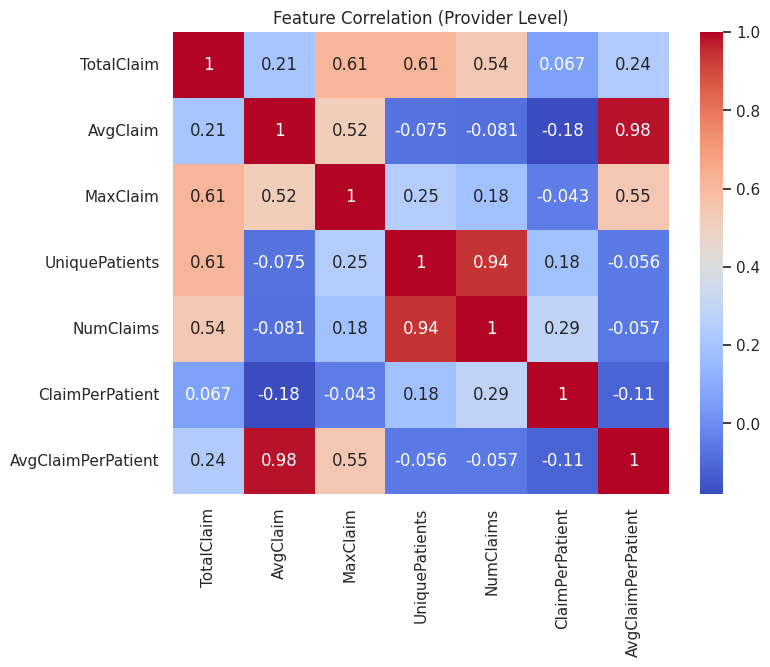

In [24]:
numeric_cols = ['TotalClaim', 'AvgClaim', 'MaxClaim',
                'UniquePatients', 'NumClaims',
                'ClaimPerPatient', 'AvgClaimPerPatient']

plt.figure(figsize=(8,6))
sns.heatmap(provider_features[numeric_cols].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Provider Level)")
plt.show()

In [25]:
provider_features.to_csv('/content/provider_features.csv', index=False)